# **DATA PREPROCESSING**

In [121]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [122]:
data=pd.read_csv('data.csv')
data

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,20.200000,33.000000,0.0,444.00,0.004834,0
1,22.166667,21.463333,518.0,898.00,0.003540,1
2,20.200000,21.200000,0.0,439.00,0.003097,0
3,19.700000,19.500000,0.0,452.00,0.002760,0
4,19.890000,26.600000,0.0,441.00,0.003816,0
...,...,...,...,...,...,...
10803,19.390000,30.745000,0.0,436.00,0.004279,0
10804,20.290000,33.200000,0.0,454.00,0.004891,0
10805,19.600000,19.500000,13.5,454.50,0.002743,0
10806,21.500000,24.100000,0.0,612.75,0.003818,0


In [123]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10808 entries, 0 to 10807
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Temperature    10808 non-null  float64
 1   Humidity       10808 non-null  float64
 2   Light          10808 non-null  float64
 3   CO2            10808 non-null  float64
 4   HumidityRatio  10808 non-null  float64
 5   Occupancy      10808 non-null  int64  
dtypes: float64(5), int64(1)
memory usage: 506.8 KB


# Data Exploration

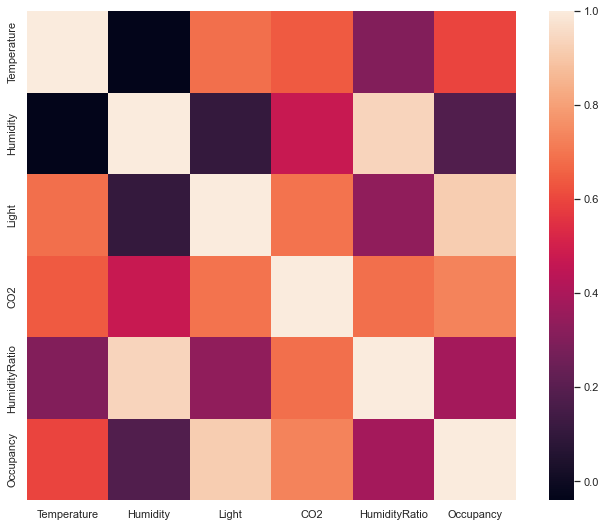

In [124]:
import matplotlib.pyplot as plt
import seaborn as sns
#correlation matrix
corrmat = data.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=1, square=True);

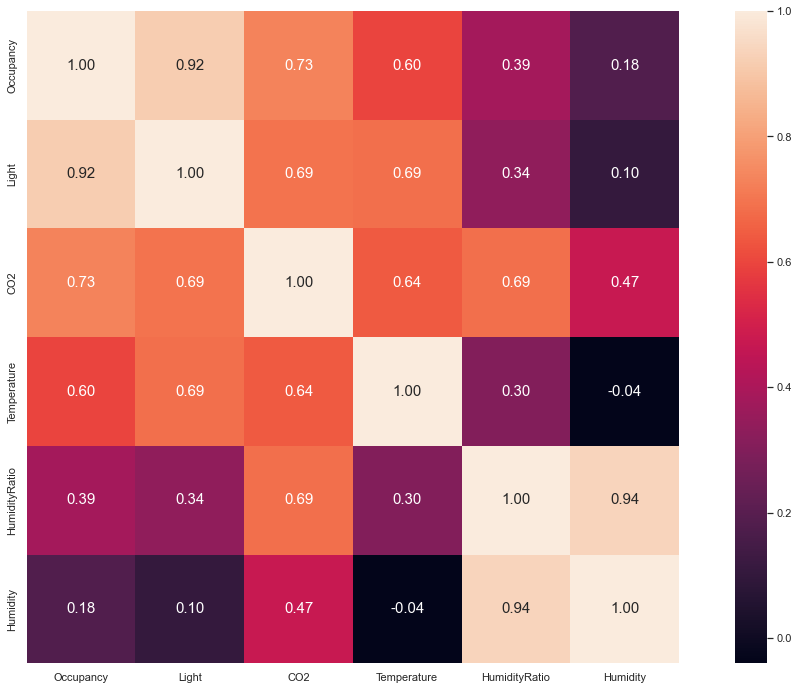

In [125]:
#correlation matrix
k = len(data.columns) #number of variables for heatmap
cols = corrmat.nlargest(k, 'Occupancy')['Occupancy'].index
cm = np.corrcoef(data[cols].values.T)
sns.set(font_scale=1)
f, ax = plt.subplots(figsize=(20, 12))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 15}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()


In [126]:
data.columns

Index(['Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio',
       'Occupancy'],
      dtype='object')

In [127]:
#Remove correlation below 0.2
data.drop('Humidity',axis=1,inplace=True)
data.head()


,Temperature,Light,CO2,HumidityRatio,Occupancy
0,20.200000,0.0,444.0,0.004834,0
1,22.166667,518.0,898.0,0.003540,1
2,20.200000,0.0,439.0,0.003097,0
3,19.700000,0.0,452.0,0.002760,0
4,19.890000,0.0,441.0,0.003816,0


# Prepare train and test dataset

In [128]:
#creating our X feature variables and y outcome variable
#X = data.drop('diagnosis',axis=1)
X = data.drop('Occupancy',axis=1)
y = data['Occupancy']

In [129]:
#splitting our data into training and testing data set
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

# **Random Forest Classification**

In [130]:
#Random Forest Classification
from sklearn.ensemble import RandomForestClassifier

clf=RandomForestClassifier()
clf.fit(X_train,y_train)


RandomForestClassifier()

In [131]:
#To predict occupancy using the test's set features
clf_pred=clf.predict(X_test)
print(clf_pred)

[0 0 0 ... 0 0 0]


In [132]:
# Transfer the array of predicted popularity of test data into dataframe
clf_pred_df = pd.DataFrame(data=clf_pred, columns=['Occupancy'])
clf_pred_df.head(10)

,Occupancy
0,0
1,0
2,0
3,1
4,0
5,0
6,0
7,0
8,0
9,1


In [133]:
RFprob_each = clf.predict_proba(X_test)
RFprob_each

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [134]:
pos_prob = []
for inner in RFprob_each:
    pos_prob.append(inner[1])
pos_prob[0:10]


[0.0, 0.0, 0.0, 0.97, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]

In [135]:
X_test

,Temperature,Light,CO2,HumidityRatio
5291,19.890000,0.0,440.50,0.003771
8986,19.426667,0.0,460.00,0.003748
1367,19.890000,0.0,442.50,0.002721
4943,21.500000,507.5,655.50,0.003081
9903,19.500000,0.0,467.00,0.003695
...,...,...,...,...
7069,21.500000,0.0,740.00,0.003277
2641,19.100000,0.0,433.00,0.004298
5534,20.315000,0.0,487.00,0.004869
1608,20.700000,0.0,493.25,0.003770


In [136]:
X_testdf = X_test.copy()
X_testdf.insert(len(X_testdf.columns),'y_test Occupancy',y_test)
X_testdf=X_testdf.reset_index(drop=True)
X_testdf

,Temperature,Light,CO2,HumidityRatio,y_test Occupancy
0,19.890000,0.0,440.50,0.003771,0
1,19.426667,0.0,460.00,0.003748,0
2,19.890000,0.0,442.50,0.002721,0
3,21.500000,507.5,655.50,0.003081,1
4,19.500000,0.0,467.00,0.003695,0
...,...,...,...,...,...
2157,21.500000,0.0,740.00,0.003277,0
2158,19.100000,0.0,433.00,0.004298,0
2159,20.315000,0.0,487.00,0.004869,0
2160,20.700000,0.0,493.25,0.003770,0


In [137]:
# Insert result, check the prediction correctness
X_testdf.insert(len(X_testdf.columns), 'RForest', clf_pred_df['Occupancy'])
X_testdf

,Temperature,Light,CO2,HumidityRatio,y_test Occupancy,RForest
0,19.890000,0.0,440.50,0.003771,0,0
1,19.426667,0.0,460.00,0.003748,0,0
2,19.890000,0.0,442.50,0.002721,0,0
3,21.500000,507.5,655.50,0.003081,1,1
4,19.500000,0.0,467.00,0.003695,0,0
...,...,...,...,...,...,...
2157,21.500000,0.0,740.00,0.003277,0,0
2158,19.100000,0.0,433.00,0.004298,0,0
2159,20.315000,0.0,487.00,0.004869,0,0
2160,20.700000,0.0,493.25,0.003770,0,0


# **Naive Bayes**

In [138]:
from sklearn.naive_bayes import GaussianNB

gaus = GaussianNB()
gaus.fit(X_train, y_train)

GaussianNB()

In [139]:
# To predict occupancy using test set's features
NB_pred= gaus.predict(X_test)
print(NB_pred)

[0 0 0 ... 0 0 0]


In [140]:
# Transfer the array of predicted popularity of test data into dataframe
NB_pred_df = pd.DataFrame(data=NB_pred, columns=['Occupancy'])
NB_pred_df.head(10)

,Occupancy
0,0
1,0
2,0
3,1
4,0
5,0
6,0
7,0
8,0
9,1


In [141]:
NBprob_each = gaus.predict_proba(X_test)
NBprob_each

array([[1.00000000e+00, 3.60694359e-13],
       [1.00000000e+00, 1.33197987e-13],
       [1.00000000e+00, 3.59842433e-13],
       ...,
       [1.00000000e+00, 1.07816683e-12],
       [1.00000000e+00, 2.48658399e-12],
       [1.00000000e+00, 2.68076870e-12]])

In [142]:
pos_prob = []
for inner in NBprob_each:
    pos_prob.append(inner[1])
pos_prob[0:10]


[3.6069435870994693e-13,
 1.331979865711996e-13,
 3.598424334062771e-13,
 0.9999989267065303,
 1.6137441397374502e-13,
 1.2388716756143887e-13,
 0.003746178485857548,
 0.00012261572916944926,
 2.690653594077191e-12,
 0.9999998605986642]

In [143]:
# Insert result, check the prediction correctness
X_testdf.insert(len(X_testdf.columns), 'NBGaus', NB_pred_df['Occupancy'])
X_testdf

,Temperature,Light,CO2,HumidityRatio,y_test Occupancy,RForest,NBGaus
0,19.890000,0.0,440.50,0.003771,0,0,0
1,19.426667,0.0,460.00,0.003748,0,0,0
2,19.890000,0.0,442.50,0.002721,0,0,0
3,21.500000,507.5,655.50,0.003081,1,1,1
4,19.500000,0.0,467.00,0.003695,0,0,0
...,...,...,...,...,...,...,...
2157,21.500000,0.0,740.00,0.003277,0,0,0
2158,19.100000,0.0,433.00,0.004298,0,0,0
2159,20.315000,0.0,487.00,0.004869,0,0,0
2160,20.700000,0.0,493.25,0.003770,0,0,0


# **KNN Classification**

In [144]:
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier 

# try K=1 through K=25 and record testing accuracy
k_range = range(1, 26)

# We can create Python dictionary using [] or dict()
scores = []

# We use a loop through the range 1 to 26
# We append the scores in the dictionary
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

Text(0, 0.5, 'Testing Accuracy')

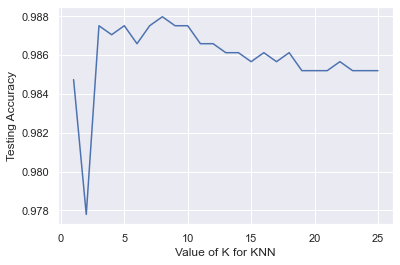

In [145]:
# import Matplotlib (scientific plotting library)
import matplotlib.pyplot as plt

# allow plots to appear within the notebook
%matplotlib inline

# plot the relationship between K and testing accuracy
# plt.plot(x_axis, y_axis)
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

In [146]:
#Selection of n_neighbours as we do not want to underfit / overfit
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=6)

In [147]:
# To predict occupancy using test set's features
KNN_pred= knn.predict(X_test)
print(KNN_pred)

[0 0 0 ... 0 0 0]


In [148]:
# Transfer the array of predicted popularity of test data into dataframe
KNpredct_df = pd.DataFrame(data=KNN_pred, columns=['Occupancy'])
KNpredct_df.head(10)

,Occupancy
0,0
1,0
2,0
3,1
4,0
5,0
6,0
7,0
8,0
9,1


In [149]:
KNprob_each = knn.predict_proba(X_test)
KNprob_each

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [150]:
pos_prob = []
for inner in KNprob_each:
    pos_prob.append(inner[1])
pos_prob[0:10]

[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]

In [151]:
# Insert result, check the prediction correctness
X_testdf.insert(len(X_testdf.columns), 'KNeigh', KNpredct_df['Occupancy'])
X_testdf


,Temperature,Light,CO2,HumidityRatio,y_test Occupancy,RForest,NBGaus,KNeigh
0,19.890000,0.0,440.50,0.003771,0,0,0,0
1,19.426667,0.0,460.00,0.003748,0,0,0,0
2,19.890000,0.0,442.50,0.002721,0,0,0,0
3,21.500000,507.5,655.50,0.003081,1,1,1,1
4,19.500000,0.0,467.00,0.003695,0,0,0,0
...,...,...,...,...,...,...,...,...
2157,21.500000,0.0,740.00,0.003277,0,0,0,0
2158,19.100000,0.0,433.00,0.004298,0,0,0,0
2159,20.315000,0.0,487.00,0.004869,0,0,0,0
2160,20.700000,0.0,493.25,0.003770,0,0,0,0


# **Decision Tree**

In [152]:
from sklearn import tree
model = tree.DecisionTreeClassifier()
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [153]:
#To predict occupancy using the test's set features
model_pred=model.predict(X_test)
print(model_pred)

[0 0 0 ... 0 0 0]


In [154]:
# Transfer the array of predicted popularity of test data into dataframe
model_pred_df = pd.DataFrame(data=model_pred, columns=['Occupancy'])
model_pred_df.head(10)

,Occupancy
0,0
1,0
2,0
3,1
4,0
5,0
6,0
7,0
8,0
9,1


In [155]:
DTprob_each = model.predict_proba(X_test)
DTprob_each

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [156]:
pos_prob = []
for inner in DTprob_each:
    pos_prob.append(inner[1])
pos_prob[0:10]


[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]

In [157]:
# Insert result, check the prediction correctness
X_testdf.insert(len(X_testdf.columns), 'DecisionT', clf_pred_df['Occupancy'])
X_testdf


,Temperature,Light,CO2,HumidityRatio,y_test Occupancy,RForest,NBGaus,KNeigh,DecisionT
0,19.890000,0.0,440.50,0.003771,0,0,0,0,0
1,19.426667,0.0,460.00,0.003748,0,0,0,0,0
2,19.890000,0.0,442.50,0.002721,0,0,0,0,0
3,21.500000,507.5,655.50,0.003081,1,1,1,1,1
4,19.500000,0.0,467.00,0.003695,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
2157,21.500000,0.0,740.00,0.003277,0,0,0,0,0
2158,19.100000,0.0,433.00,0.004298,0,0,0,0,0
2159,20.315000,0.0,487.00,0.004869,0,0,0,0,0
2160,20.700000,0.0,493.25,0.003770,0,0,0,0,0


# **Evaluation for Classifiers**

In [158]:
#Import relevant metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

In [159]:
#RANDOM FOREST
acRF=accuracy_score(y_test,clf_pred)
fscoreRF=f1_score(y_test,clf_pred)
conmatrixRF = confusion_matrix(y_test,clf_pred)

#NAIVE BAYES
acNB=accuracy_score(y_test,NB_pred)
fscoreNB = f1_score(y_test,NB_pred)
conmatrixNB = confusion_matrix(y_test,NB_pred)

#K NEIGHBOURS
acKNN=accuracy_score(y_test,KNN_pred)
fscoreKNN=f1_score(y_test,KNN_pred)
conmatrixKNN = confusion_matrix(y_test,KNN_pred)

#DECISION TREE
acDTree = accuracy_score(y_test,model_pred)
fscoreDTree = f1_score(y_test,model_pred)
conmatrixDTree = confusion_matrix(y_test,model_pred)


In [160]:
df = pd.DataFrame(
    {
        "KNeigh": [acKNN, fscoreKNN, conmatrixKNN],
        "Naive Bayes": [acNB, fscoreNB, conmatrixNB],
        "Random Forest": [acRF, fscoreRF, conmatrixRF],
        "Decision Tree": [acDTree, fscoreDTree, conmatrixDTree]
    },
    columns=["KNeigh", "Naive Bayes", "Random Forest", "Decision Tree"],
    index = ["Accuracy", "Fscore", "Confusion Matrix"])
df



,KNeigh,Naive Bayes,Random Forest,Decision Tree
Accuracy,0.986586,0.966235,0.989362,0.987049
Fscore,0.971981,0.932966,0.977561,0.972656
Confusion Matrix,"[[1630, 20], [9, 503]]","[[1581, 69], [4, 508]]","[[1638, 12], [11, 501]]","[[1636, 14], [14, 498]]"
